In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [23]:
data = pd.read_excel("Base_Final.xlsx")
data.head()

,Unnamed: 0,Consumo Maximo,Consumo Minimo,Consumo Maximo - 12 Meses,Consumo Minimo - 12 Meses,Consumo 11/2018,Consumo 12/2018,Consumo 01/2019,Consumo 02/2019,Consumo 03/2019,...,Qtd TOI,Consumo 12M (09/2022),Consumo 12M (09/2021),Consumo 12M (09/2020),Consumo 12M (09/2019),Valor Referencia Anual,Valor Referencia Mensal,Desvio Mensal em relação ao valor Base,Diferença em Energia,[Desvio Padrao 12 M]/[Media Consumo 12 M]
0,12,580,102,326,216,310,288,244,580,304,...,1,3232,3166,2828,3312,3312,276.000000,-0.153374,80,0.121876
1,18,274,130,184,152,195,214,195,194,189,...,0,2053,2003,2043,2265,2265,188.750000,0.130240,212,0.068025
2,22,868,370,667,538,660,712,632,564,610,...,0,7337,7008,5950,7087,7087,590.583333,-0.087197,-250,0.075029
3,27,1952,90,119,90,894,1003,954,740,576,...,1,1207,6062,10542,9099,10542,878.500000,7.447115,9335,0.092199
4,28,1177,119,818,449,472,446,403,385,434,...,0,7255,9238,9847,6196,9847,820.583333,0.196186,2592,0.176725


In [3]:
number_of_fraud = len(data[data['Qtd TOI'] == 1])
number_of_normal= len(data[data['Qtd TOI'] == 0])

print ("Fraude:", number_of_fraud)
print ("Normal:",number_of_normal)

Fraude: 34945
Normal: 96803


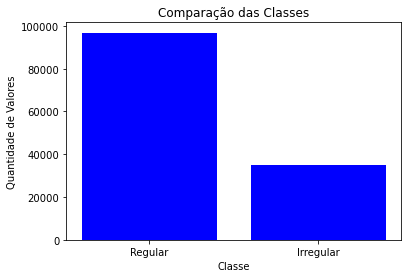

In [6]:
classes = ['Regular', 'Irregular']
valores = [number_of_normal, number_of_fraud]
plt.title('Comparação das Classes')
plt.ylabel('Quantidade de Valores')
plt.xlabel('Classe')
plt.bar(classes, valores, color='blue')
plt.savefig("Comparação_Classes")

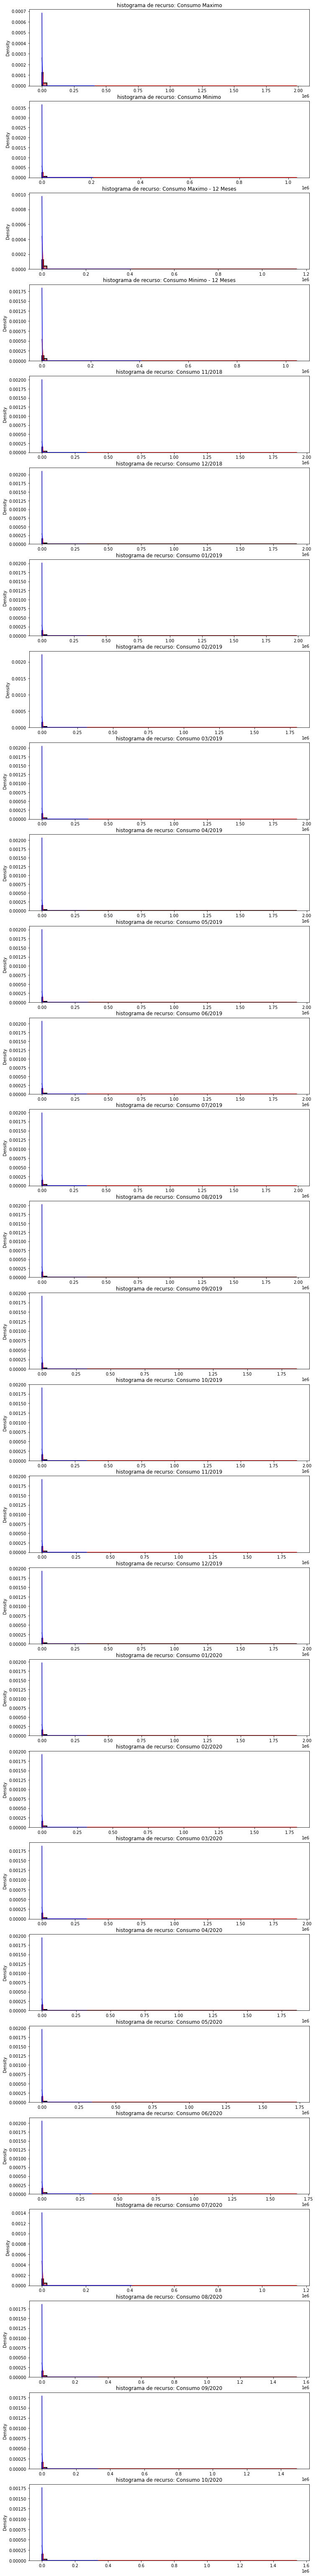

In [19]:
features = data.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(data[cn][data['Qtd TOI'] == 1], bins=50, kde=True, stat="density", linewidth=2, color='red')
    sns.histplot(data[cn][data['Qtd TOI'] == 0], bins=50, kde=True, stat="density", linewidth=2, color='blue')
    ax.set_xlabel('')
    ax.set_title('histograma de recurso: ' + str(cn))
plt.show()

In [25]:
data = data.drop(data.iloc[:,1:5], axis=1)

In [26]:
data.head()

,Unnamed: 0,Consumo 11/2018,Consumo 12/2018,Consumo 01/2019,Consumo 02/2019,Consumo 03/2019,Consumo 04/2019,Consumo 05/2019,Consumo 06/2019,Consumo 07/2019,...,Qtd TOI,Consumo 12M (09/2022),Consumo 12M (09/2021),Consumo 12M (09/2020),Consumo 12M (09/2019),Valor Referencia Anual,Valor Referencia Mensal,Desvio Mensal em relação ao valor Base,Diferença em Energia,[Desvio Padrao 12 M]/[Media Consumo 12 M]
0,12,310,288,244,580,304,216,204,205,301,...,1,3232,3166,2828,3312,3312,276.000000,-0.153374,80,0.121876
1,18,195,214,195,194,189,192,168,183,178,...,0,2053,2003,2043,2265,2265,188.750000,0.130240,212,0.068025
2,22,660,712,632,564,610,548,513,552,542,...,0,7337,7008,5950,7087,7087,590.583333,-0.087197,-250,0.075029
3,27,894,1003,954,740,576,529,519,448,736,...,1,1207,6062,10542,9099,10542,878.500000,7.447115,9335,0.092199
4,28,472,446,403,385,434,308,119,572,973,...,0,7255,9238,9847,6196,9847,820.583333,0.196186,2592,0.176725


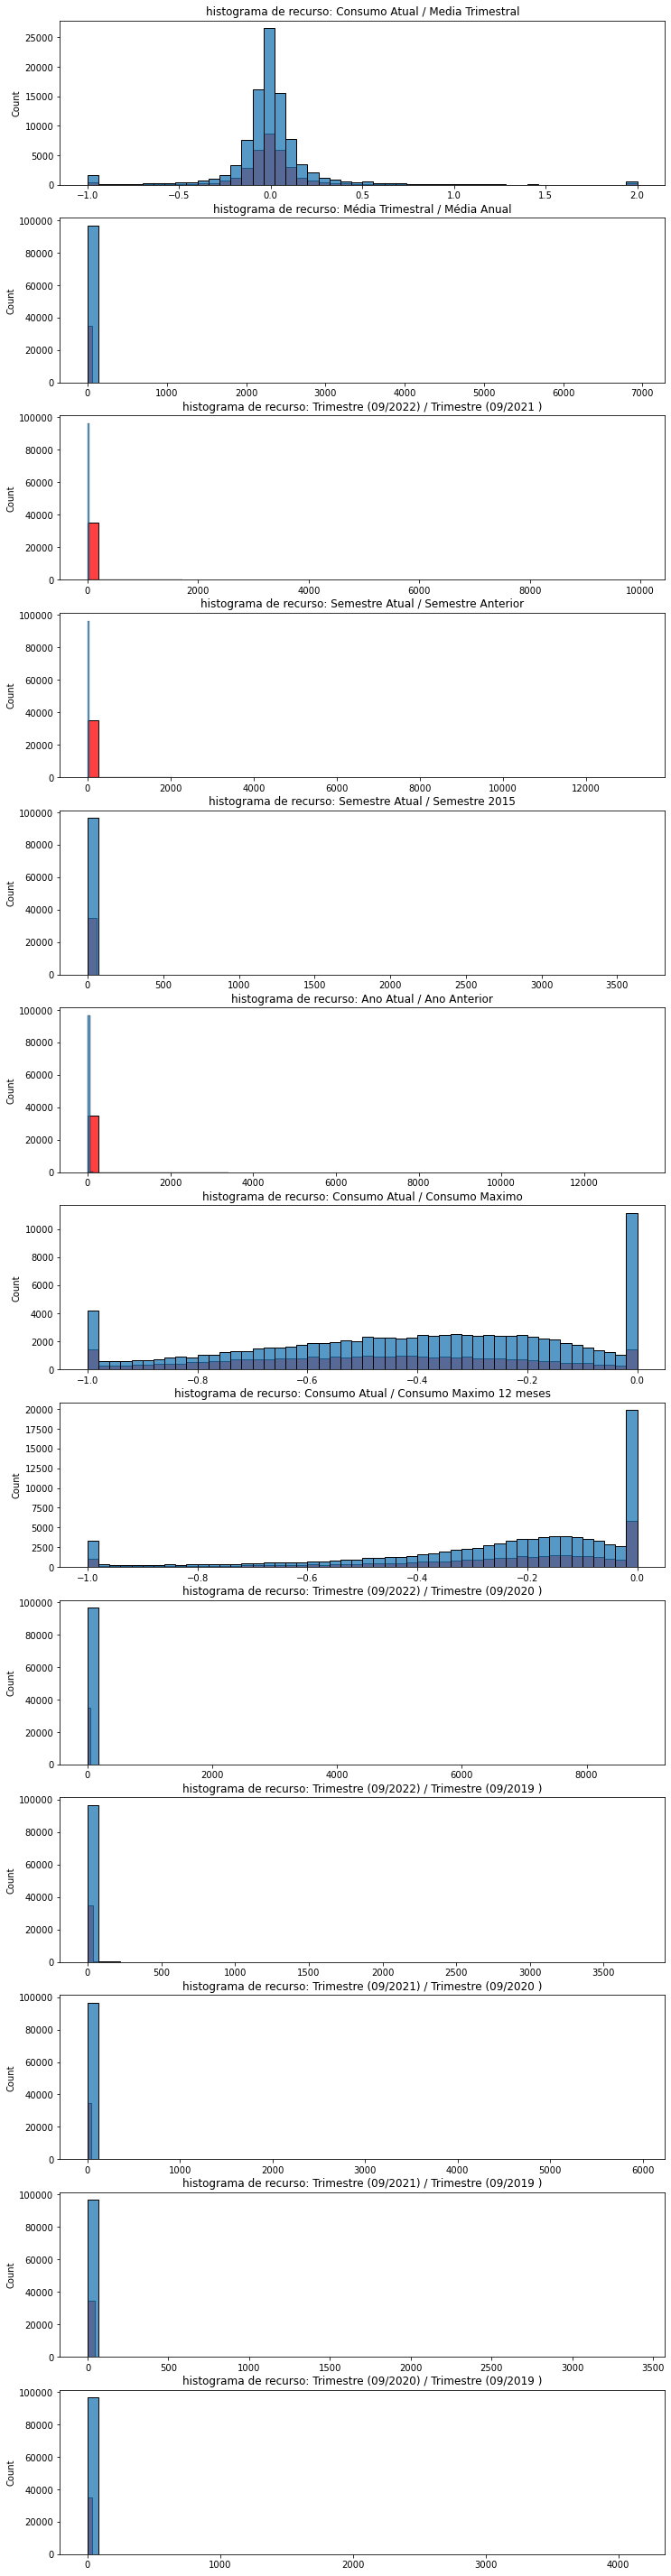

In [28]:
features = data.iloc[:,48:61].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(data[cn][data['Qtd TOI'] == 1], bins=50, color='red')
    sns.histplot(data[cn][data['Qtd TOI'] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma de recurso: ' + str(cn))
plt.show()

In [32]:
data = data.drop(['Consumo Atual / Media Trimestral', 'Média Trimestral / Média Anual', 'Semestre Atual / Semestre 2015', 'Consumo Atual / Consumo Maximo', 'Consumo Atual / Consumo Maximo 12 meses', 'Trimestre (09/2022) / Trimestre (09/2020 )', 'Trimestre (09/2022) / Trimestre (09/2019 )', 'Trimestre (09/2021) / Trimestre (09/2020 )', 'Trimestre (09/2021) / Trimestre (09/2019 )', 'Trimestre (09/2020) / Trimestre (09/2019 )'], axis=1)

In [33]:
data.head()

,Unnamed: 0,Consumo 11/2018,Consumo 12/2018,Consumo 01/2019,Consumo 02/2019,Consumo 03/2019,Consumo 04/2019,Consumo 05/2019,Consumo 06/2019,Consumo 07/2019,...,Qtd TOI,Consumo 12M (09/2022),Consumo 12M (09/2021),Consumo 12M (09/2020),Consumo 12M (09/2019),Valor Referencia Anual,Valor Referencia Mensal,Desvio Mensal em relação ao valor Base,Diferença em Energia,[Desvio Padrao 12 M]/[Media Consumo 12 M]
0,12,310,288,244,580,304,216,204,205,301,...,1,3232,3166,2828,3312,3312,276.000000,-0.153374,80,0.121876
1,18,195,214,195,194,189,192,168,183,178,...,0,2053,2003,2043,2265,2265,188.750000,0.130240,212,0.068025
2,22,660,712,632,564,610,548,513,552,542,...,0,7337,7008,5950,7087,7087,590.583333,-0.087197,-250,0.075029
3,27,894,1003,954,740,576,529,519,448,736,...,1,1207,6062,10542,9099,10542,878.500000,7.447115,9335,0.092199
4,28,472,446,403,385,434,308,119,572,973,...,0,7255,9238,9847,6196,9847,820.583333,0.196186,2592,0.176725


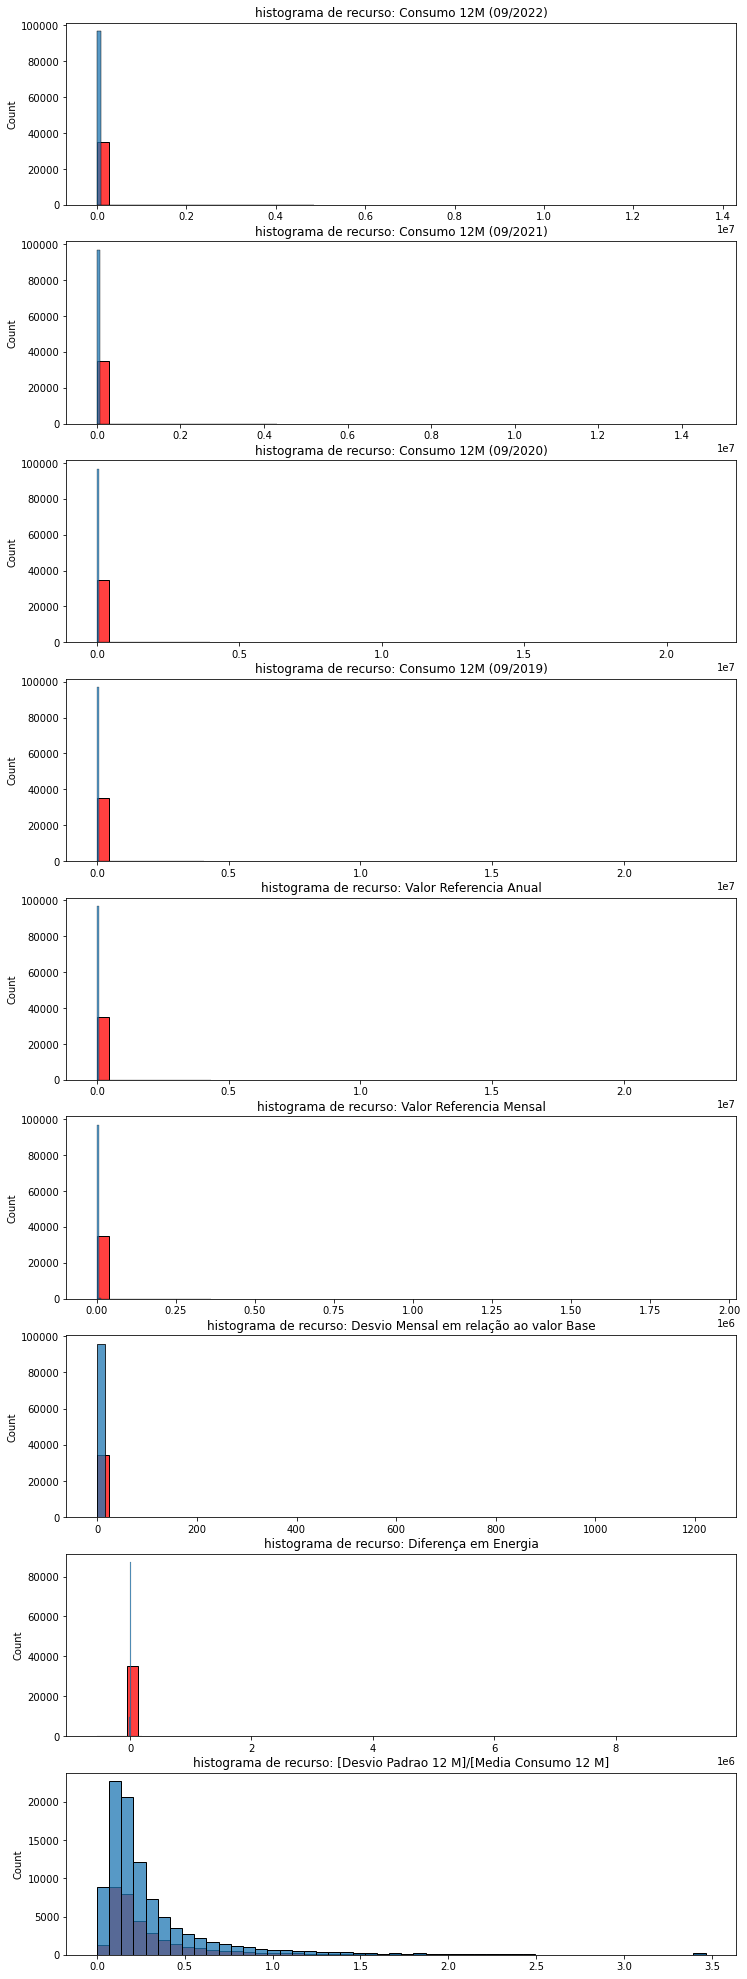

In [36]:
features = data.iloc[:,52:61].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(data[cn][data['Qtd TOI'] == 1], bins=50, color='red')
    sns.histplot(data[cn][data['Qtd TOI'] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histograma de recurso: ' + str(cn))
plt.show()

In [39]:
data = data.drop(['Desvio Mensal em relação ao valor Base', '[Desvio Padrao 12 M]/[Media Consumo 12 M]'], axis=1)

In [40]:
data.head()

,Unnamed: 0,Consumo 11/2018,Consumo 12/2018,Consumo 01/2019,Consumo 02/2019,Consumo 03/2019,Consumo 04/2019,Consumo 05/2019,Consumo 06/2019,Consumo 07/2019,...,Semestre Atual / Semestre Anterior,Ano Atual / Ano Anterior,Qtd TOI,Consumo 12M (09/2022),Consumo 12M (09/2021),Consumo 12M (09/2020),Consumo 12M (09/2019),Valor Referencia Anual,Valor Referencia Mensal,Diferença em Energia
0,12,310,288,244,580,304,216,204,205,301,...,0.147444,0.020846,1,3232,3166,2828,3312,3312,276.000000,80
1,18,195,214,195,194,189,192,168,183,178,...,0.020899,0.024963,0,2053,2003,2043,2265,2265,188.750000,212
2,22,660,712,632,564,610,548,513,552,542,...,-0.033689,0.046946,0,7337,7008,5950,7087,7087,590.583333,-250
3,27,894,1003,954,740,576,529,519,448,736,...,-0.122126,-0.800891,1,1207,6062,10542,9099,10542,878.500000,9335
4,28,472,446,403,385,434,308,119,572,973,...,-0.111491,-0.214657,0,7255,9238,9847,6196,9847,820.583333,2592


In [41]:
#índices of normal class
indices_of_normal = data[data['Qtd TOI'] == 0].index
#escolha aleatoriamente a mesma quantidade de amostras que a fraude e retorne seus índices
random_indices_of_normal = np.array(np.random.choice(indices_of_normal, number_of_fraud, replace=False))
#indices of fraud class
indices_of_fraud = np.array(data[data['Qtd TOI'] == 1].index)
#indices of undersampled dataset
indices_of_undersampled = np.concatenate([random_indices_of_normal, indices_of_fraud])
#conjunto de dados com pouca amostra
data_of_undersampled = data.iloc[indices_of_undersampled,:]

print(len(data_of_undersampled))

69890


In [79]:
#conjunto de dados inteiro
X = data.loc[:,data.columns!='Qtd TOI']
y = data.loc[:,data.columns=='Qtd TOI']

#treinar e testar o conjunto de dados dividido em todo o conjunto de dados, com proporção 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print('BASE DE DADOS ORIGINAL')
print('----------------------')
print("Numero de dados de treino: ", len(X_train))
print("Conjunto de dados de teste: ", len(X_test))
print("Numero total de dados: ", len(X_train)+len(X_test))

BASE DE DADOS ORIGINAL
----------------------
Numero de dados de treino:  92223
Conjunto de dados de teste:  39525
Numero total de dados:  131748


In [73]:
#conjunto de dados com pouca amostra
X_undersampled = data_of_undersampled.loc[:,data_of_undersampled.columns!='Qtd TOI']
y_undersampled = data_of_undersampled.loc[:,data_of_undersampled.columns=='Qtd TOI']

#conjunto de dados de trem e teste dividido a partir de um conjunto de dados com pouca amostra, com razão 70/30
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.3, random_state = 0)

print('BASE DE DADOS REDUZIDA')
print('----------------------')
print("Numero de transacoes treinar conjunto de dados: ", len(X_train_undersampled))
print("Conjunto de dados de teste de transacoes numericas: ", len(X_test_undersampled))
print("Numero total de transacoes: ", len(X_train_undersampled)+len(X_test_undersampled))

BASE DE DADOS REDUZIDA
----------------------
Numero de transacoes treinar conjunto de dados:  48923
Conjunto de dados de teste de transacoes numericas:  20967
Numero total de transacoes:  69890


In [74]:
number_of_fraud = len(data_of_undersampled[data_of_undersampled['Qtd TOI'] == 1])
number_of_normal= len(data_of_undersampled[data_of_undersampled['Qtd TOI'] == 0])

print ("Fraude:", number_of_fraud)
print ("Normal:",number_of_normal)

Fraude: 34945
Normal: 34945


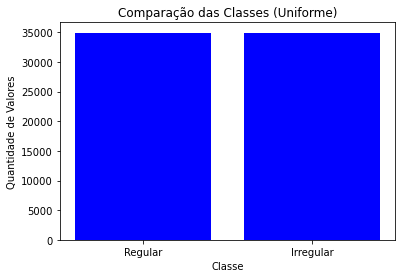

In [80]:
classes = ['Regular', 'Irregular']
valores = [number_of_normal, number_of_fraud]
plt.title('Comparação das Classes (Uniforme)')
plt.ylabel('Quantidade de Valores')
plt.xlabel('Classe')
plt.bar(classes, valores, color='blue')
plt.savefig("Comparação_Classes")

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()
modelo.fit(X_train, y_train)

resultado = modelo.score(X_test, y_test)
print("Acurácia:", resultado)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11324\289902577.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


Acurácia: 0.7379633143580012


<AxesSubplot:>

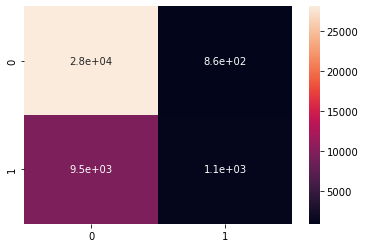

In [84]:
y_test_prediction = modelo.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_test_prediction)
sns.heatmap(cf_matrix, annot=True)

In [85]:
print("RELATÓRIO DE CLASSIFICAÇÃO")
print("--------------------------")
print(classification_report(y_test, y_test_prediction))

RELATÓRIO DE CLASSIFICAÇÃO
--------------------------
              precision    recall  f1-score   support

           0       0.75      0.97      0.84     28899
           1       0.57      0.11      0.18     10626

    accuracy                           0.74     39525
   macro avg       0.66      0.54      0.51     39525
weighted avg       0.70      0.74      0.67     39525



In [86]:
modelo.fit(X_train_undersampled, y_train_undersampled)

resultado = modelo.score(X_test_undersampled, y_test_undersampled)
print("Acurácia:", resultado)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11324\1514380537.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_undersampled, y_train_undersampled)


Acurácia: 0.652787714026804


<AxesSubplot:>

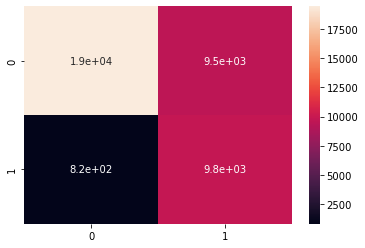

In [87]:
y_test_prediction = modelo.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_test_prediction)
sns.heatmap(cf_matrix, annot=True)

In [88]:
print("RELATÓRIO DE CLASSIFICAÇÃO")
print("--------------------------")
print(classification_report(y_test, y_test_prediction))

RELATÓRIO DE CLASSIFICAÇÃO
--------------------------
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     28899
           1       0.51      0.92      0.66     10626

    accuracy                           0.74     39525
   macro avg       0.73      0.80      0.72     39525
weighted avg       0.84      0.74      0.75     39525



<AxesSubplot:>

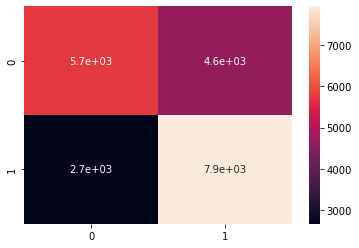

In [89]:
y_test_prediction = modelo.predict(X_test_undersampled)
cf_matrix = confusion_matrix(y_test_undersampled, y_test_prediction)
sns.heatmap(cf_matrix, annot=True)

In [91]:
print("RELATÓRIO DE CLASSIFICAÇÃO")
print("--------------------------")
print(classification_report(y_test_undersampled, y_test_prediction))

RELATÓRIO DE CLASSIFICAÇÃO
--------------------------
              precision    recall  f1-score   support

           0       0.68      0.55      0.61     10361
           1       0.63      0.75      0.69     10606

    accuracy                           0.65     20967
   macro avg       0.66      0.65      0.65     20967
weighted avg       0.66      0.65      0.65     20967



In [98]:
data_of_undersampled.head()

,Unnamed: 0,Consumo 11/2018,Consumo 12/2018,Consumo 01/2019,Consumo 02/2019,Consumo 03/2019,Consumo 04/2019,Consumo 05/2019,Consumo 06/2019,Consumo 07/2019,...,Semestre Atual / Semestre Anterior,Ano Atual / Ano Anterior,Qtd TOI,Consumo 12M (09/2022),Consumo 12M (09/2021),Consumo 12M (09/2020),Consumo 12M (09/2019),Valor Referencia Anual,Valor Referencia Mensal,Diferença em Energia
65274,237395,139,84,126,105,123,130,116,127,134,...,-0.312224,-0.521949,0,893,1868,1839,1516,1868,155.666667,975
100837,359372,0,0,0,0,0,0,0,0,0,...,-0.050526,-0.032641,0,978,1011,1042,0,1042,86.833333,64
85116,311242,120,204,130,133,170,147,150,140,157,...,0.005988,-0.151401,0,2483,2926,2448,1812,2926,243.833333,443
19038,35760,484,552,594,543,526,539,646,544,614,...,-0.026398,-0.136863,0,5266,6101,6804,7117,7117,593.083333,1851
101641,361836,0,0,0,0,0,0,0,0,0,...,0.101523,0.076923,0,2198,2041,1160,0,2041,170.083333,-157


In [101]:
from sklearn.datasets import load_iris 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
import pandas as pd 
from sklearn.metrics import plot_confusion_matrix 
import matplotlib.pyplot as plt

X = data.drop('Qtd TOI', axis=1)
y = data['Qtd TOI']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2) 
sc_X = StandardScaler() 
X_trainscaled=sc_X.fit_transform(X_train) 
X_testscaled=sc_X.transform(X_test)

In [102]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train) 
y_pred=clf.predict(X_testscaled) 
print(clf.score(X_testscaled, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7251992409867173
